과제 : 파이썬 머신러닝 완벽가이드 ch4. 3~ 6 pg. 210~ 244

### **[개념 정리]**
---
### **03. 앙상블 학습**

(1) 앙상블 학습 개요
- 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 더 정확한 예측을 도출하는 기법
- 정형 데이터 분류에서 뛰어난 성능( 비정형은 딥러닝), 회귀 분야에서도 예측 성능 좋음
- **대표 알고리즘**: 랜덤 포레스트, 그래디언트 부스트, XGBoost, LightGBM(빠른 수행 속도), 스태킹(메타 모델)
- **유형**: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 그외(스태깅)
   - 보팅✅ :  서로 다른 분류기 결합- 다른 ML알고리즘
   - 배깅✅ :  같은 유형의 알고리즘 기반 분류기 결합, 데이터 샘플링을 다르게 하면서 학습- *부트 스트래핑 분할(원본 데이터 샘플링), 각 데이터 세트의 중첩 허용. // ☑_랜덤 포레스트_
   - 보팅, 배깅 둘다 여러 분류기의 투표(보팅)로 최종 예측 결정.
   - 부스팅✅ :  여러 분류기 순차 학습, 앞의 분류기가 예측 틀린 데이터 대해 다음 분류기에는 가중치 부여(부스팅)해 학습, 예측 진행. 앙상블학습 주도. // ☑_그래디언트 부스트, XGBoost, LightGBM_
   - 스태킹✅: 여러 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어 다른 모델로 재학습, 예측


(2) 보팅 유형- 하드 보팅, 소프트 보팅
- 하드 보팅: 다수의 분류기가 결정한 예측값을 최종 예측 결괏값으로 선정.
- 소프트 보팅: 레이블 값 결정 확률을 평균내서 확률이 가장 높은 레이블 값으로 선정. 일반적 보팅 방식.
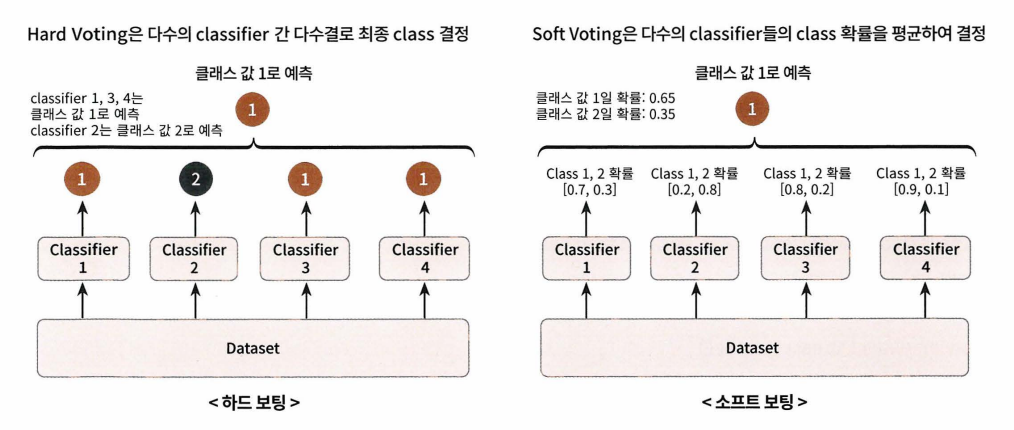


(3) 보팅 분류기
- 사이킷런의 VotingClassifier
- 위스콘신 유방암 데이터 세트: load_breast_cancer, 종양 악성여부 결정하는 이진 분류 데이터 세트
-📂 VotingClassifier( estimators =[(),()], voting = 'soft/hard')
    - estimators: 여러 분류기 객체들을 튜플로 입력, 여러개는 리스트로 묶음
    - voting: 소프트, 하드(디폴트) 방식
```
vo_clf(=보팅 객체).fit(X_train, y_train)
vo_clf.predict(X_test)
```

- 보팅이 무조건 예측 성능이 더 좋아지는 것은 아니나 전반적으론 단일 ML보다 성능이 좋음. 현실엔 다양한 변수가 있기 때문에 다양한 관점의 알고리즘 결합이 더 나은 성능을 이끈다.
- 같은 알고리즘 기반인 배깅과 부스팅은 대부분 결정트리 알고리즘 기반. 과적합의 단점이 앙상블 학습에서의 많은 분류기 결합으로 보완되어 편향-분산 트레이드오프 효과 극대화됨.



---
### **04. 랜덤 포레스트**

(1) 랜덤 포레스트의 개요 및 실습

- 배깅: 같은 알고리즘으로 여러 개의 분류기를 만들어 보팅으로 최종 결정. 대표적으로 랜덤 포레스트 알고리즘 사용
- 랜덤 포레스트✅: 기반은 결정트리 알고리즘. 여러개의 결정트리 분류기가 전체 데이터에서 배깅으로 각자 샘플링 학습, 최종적으로 모든 분류기가 보팅으로 예측 결정함

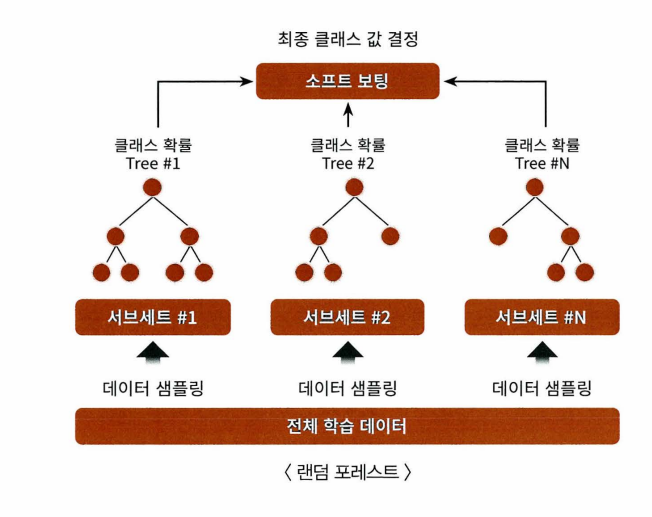

-  부트스트래핑✅: 여러 데이터 세트를 중첩되게 분리.서브세트의 데이터 건수는 전체 데이터 건수와 동일함.n_estimator로 서브세트 개수 지정가능.
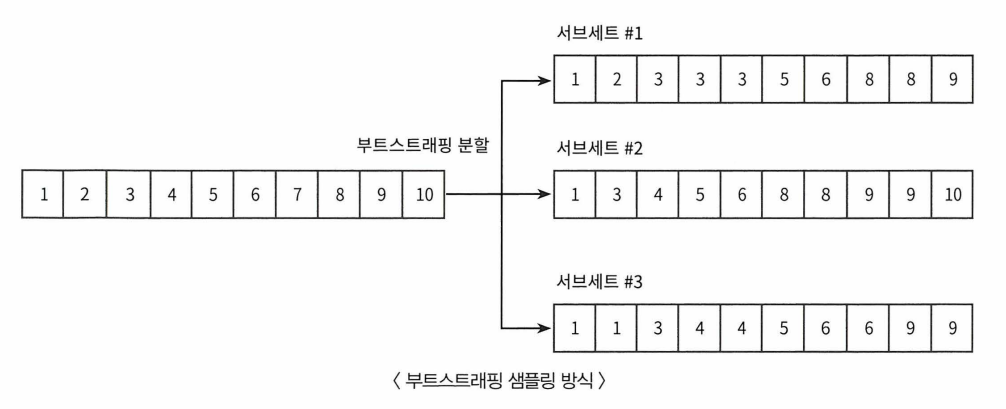
- 📂 RandomForestClassifier(): 다양한 하이터 파라미터 튜닝 가능

(2) 랜덤 포레스트 하이퍼 파라미터 튜닝
- 트리 기반 자체의 하이퍼 파라미터가 많음 + 배깅, 부스팅, 학습, 정규화 위한 파라미터
- 주요 파라미터📋:
```
  - n_estimators : 결정 트리 개수, 대체로 많을수록 성능 향상, 수행시간 증가
  - max_features: 트리 분할 위한 참조 피처 (디폴트: 'auto', 'sqrt')
  - max_depth
  - min_samples_leaf
  - min_samples_split
 * RandomForestClassifier(n_estimators=100, min_samples_leaf = 6, max_depth=16, min_samples_split=2, random_state=0)
```

- GridSearchCV로 파라미터 튜닝
  - n_jobs = -1: 모든 CPU 코어 이용해 학습
  - 파라미터들을 딕셔너리로 묶어 params 저장, params_grid = params로 한번에 수행


- rf_clf.fit/predict()
- rf_clf.feature_importances_:  알고리즘이 선택한 피처의 중요도


---
### **05. GBM(Graident Boosting Machine)**

(1) GBM 개요 및 실습
- 부스팅: 여러 약한 학습기의 순차적 학습-예측, 잘못 예측한 데이터에 가중치 부여해 오류 개선하며 학습.
- 에이다 부스트(AdaBoost)✅:
   - 1. 첫번째 약한 학습기가 기준1로 분류
   - 2. 오류 데이터에 대해 가중치(0.3) 값 부여, 크기 커짐
   - 3. 두번째 약한 학습기가 기준2로 분류
   - 4. 오류 데이터에 대해 가중치(0.5) 부여
   - 5. 세번째 약한 학습기...
   - 6. 순차적으로 오류 값에 대해 가중치(점점 증가) 부여 후 예측결정기준을 모두 결합해 최종 예측 수행

- 그래디언트 부스트(GBMBoost)✅:
   - 위와 유사, 가중치 업데이트를 경사하강법(Gradient Descent)이용하는 차이.
   - 경사하강법: 오류값(h(x)) = 실제값(y) - 예측값(F(x))를 최소화하는 방향성으로 가중치 값 업데이트
   - 📂 GradientBoostingClassifier()
   - time.time(): 현재 시간
- 일반적으로 랜덤포레스트보다 예측 성능이 뛰어남. 수행 시간이 많이 오래 걸리는 단점(병렬처리X).

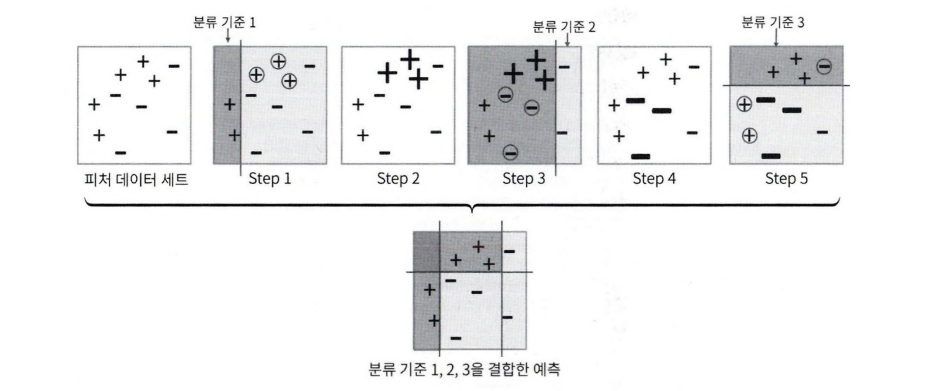

(2) GBM 하이퍼 파라미터 소개

- 트리 기반 파라미터: n_estimators, max_depth, max_features

- GBM 파라미터📋:
```
 - loss: 경사하강법에서 사용할 비용 함수
 - learning_rate: 매 학습마다 적용하는 학습률. 약한 학습기가 순차적으로 오류 값 보정할 때 적용하는 계수. n_estimator와 상호보완적으로 조합
 - n_estimators: 약한 학습기 개수. 많을수록 성능 좋아지나 시간 오래걸림(기본:100)
 - subsample: 약한 학습기가 학습에 사용하는 데이터 샘플링 비율(기본:1), 과적합 염려될 때 1보다 작게 설정
```

- GridSearchCV로 튜닝 가능하나 수행시간이 많이 오래 걸림
- 과적합에도 뛰어난 예측 성능을 가짐.
- GBM 기반 ML 패키지: XGBoost, LightGBM



---
### **06. XGBoost(eXtra Gradient Boost)**

(1) XGBoost 개요
- 트리기반의 앙상블 학습 알고리즘 중 각광받고 있음
> 장점:
   - 분류, 회귀에서 뛰어난 예측 성능
   - GBM 기반이지만 느린 수행시간과 과적합 규제부제 등의 문제 해결함 ( 병렬 학습 가능, 자체 과적합 규제)
   - Tree pruning(나무 가지치기): 긍정 이득 없는 분할을 가지치기해 분할 수를 줄임
   - 자체 내장 교차 검증: 반복 수행 횟수 최적화, 평가 값이 최적화 되면 반복 중단(조기 중단 기능)
   - 결손값 자체 처리

- 핵심 라이브러리는 C,C++로 작성되어 있으나 파이썬 패키지 제공. "xgboost" -> 파이썬 래퍼 XGBoost(네이티브)
- 사이킷런 연동 XGBClassifier, XGBRegressor ->사이킷런 래퍼 XGBoost 모듈

(2) XGBoost 설치하기
아나콘다 Command 창에서 설치

(3) 파이썬 래퍼 XGBoost 하이퍼 파라미터
- GBM과 유사한 하이퍼 파라미터 가짐 + 조기중단, 과적합 규제 위한 파라미터 추가
- 파이썬 래퍼 XGBoost 파라미터📋:

```
 - 주요 일반 파라미터: booster, silent, nthread 디폴트 값을 잘 바꾸지 않음

 - 부스터 파라미터:
    - eta(업데이트 되는 학습률) -> 사이킷헌 래퍼 클래스는 learning_rate
    - num_boost_rounds(학습 분류기 개수)
    - min_child_weight(트리 추가 분할 위한 weight 총합, *과적합 조절)
    - gamma(리프 노드 추가 분할 결정하는 최소 손실 감소 값, *과적합 조절)
    - max_depth(깊이 제한)
    - sub_sample(데이터 샘플링 비율, *과적합 조절)
    - colsample_bytree(트리 생성에 필요한 피처(칼럼) 임의 샘플링. *과적합 조정)
    - lambda(L2 Regularization 적용 값, *과적합 감소)
    - alpha(L1 Regularization 적용 값. *과적합 감소)
    - scale_pos_weight(특정 값으로 치우친 비대칭 클래스의 데이터 셋의 균형 유지 위함)

 - 학습 태스크 파라미터:
    - objective(최솟값 가져야 할 손실 함수 정의)
    - binarv:logistic: 이진 분류 시 적용
    - multi:softmax : 다중 분류 시 적용
    - multi:softprob : 개별 레이블 클래스에 해당되는 예측 확률 반환
    - eval_metric: 검증에 사용되는 함수 정의(회귀 rmse, 분류 error)

```

- 과적합 해결: eta값 낮추기(num_round 높이기), max_deapth 값 낮추기, min_child_weight 값 높이기, gamma 값 높이기, subsample, colsample_bytree 조정

- 자체적 교차검증, 성능 평가, 시각화(피처 중요도)기능
- 조기 중단 기능(num_rounds): n_estimators 지정 횟수 도달 전, 예측 오류가 N번 반복하는 동안 감소하지 않으면(개선되지 않으면) 더 이상 부스팅을 진행하지 않고 중지. 수행 시간 개선됨

(4) 파이썬 래퍼 XGBoost 적용- 위스콘신 유방암 예측

- 일반적으로 빠른 수행 처리 가능하지만, 개인용 PC는 CPU코어가 많지 않으므로 어려울수 있음.
- 종양의 악성/양성 여부 분류 데이터 세트 -> XGBoost 기반 예측
- 학습/테스트 데이터 분할 -> 학습용을 최종 학습용/검증용으로 분할(조기 중간 성능 평가 위함)
  - 조기 중단 성능 평가: 검증 데이터 세트 이용. train( early_stopping_rounds=50)
  - 평가용 데이터 세트지정 필요, eval_metric의 지정된 평가 지표로 평가용 데이터에서 예측 오류 측정.
- 파이썬 래퍼 XGBoost는 전용 데이터 객체인 DMatrix 사용( data: 피처 데이터 세트, label: 레이블/종속값 데이터 세트)
- 하이퍼 파라미터는 딕셔너리 형태로 한번에 설정
- predict 는 사이킷런에선 예측 결과 클래스 값(0,1)이었지만 xgboost에서는 예측 결과 추정 확률 값 반환. 즉, 이진분류에서는 0.5보다 크면 1
- plot_importance(): 피처 중요도 시각화, 기본 F스코어 기반으로 해당 피처의 중요도 나타냄.
   - (f스코어: 트리 분할 시 피처가 얼마나 자주 사용되었는지를 지표로 나타낸 값)
   - 피처가 넘파이일 땐 Y축의 피처명을 f0,f1,,,로 나타냄.


- to_graphiz(): 트리 기반 규칙 구조
- cv(): 자체 교차검증 수행 후 최적 파라미터 구함
    - params, dtrain, num_boost_round, nfold, stratified(bool), metrics, early_stopping_rounds
    - 데이터프레임으로 반환

(5) 사이킷런 XGBoost 개요 및 적용

- fit(), predict()로 학습/예측 가능, GridSearchCV, Pipeline 사용 가능
- 분류: XGBClassifier, 회귀: XGBRegressor
- 파라미터 변경📋:
```
 - eta -> learning_rate
 - sub_sample -> subsample
 - lambda -> reg_lambda
 - alpha -> reg_alpha
 - num_boost_round == n_estimator(적용)
```

- 조기 중단값을 급격하게 줄이면 예측 성능 저하 우려있음. 적당한 반복횟수로 지정 필요함.

### **[코드 필사]**

- 보팅 분류기

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
# 다른 개별 모델은 로지스틱 회귀와 KNN으로 함.
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators = [('LR',lr_clf),('KNN',knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

# VotingClassifier 학습, 예측, 평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습, 예측, 평가와 비교
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.956140
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


- 랜덤 포레스트

In [ ]:
### 전 과제의 코드 불러오기
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)

  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

import pandas as pd
def get_human_dataset():
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/과제/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스크 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/ESAA/과제/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/drive/MyDrive/ESAA/과제/human_activity/test/X_test.txt', sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/ESAA/과제/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/ESAA/과제/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
### 랜덤 포레스트 기반 예측 수행

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정트리에서 사용한 get_human_dataset()이용해 데이터 split
X_train, X_test, y_train, y_test  = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


In [ ]:
### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8,16,24],
    'min_samples_leaf':[1,6,12],
    'min_samples_split':[2,8,16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators = 100, random_state=0, n_jobs =-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs =-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


In [ ]:
### 도출된 최적의 파라미터로 학습, 별도의 테스트 데이터 셋에서 예측 성능 측정

rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf = 6, max_depth=16, min_samples_split=2, random_state=0)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9260


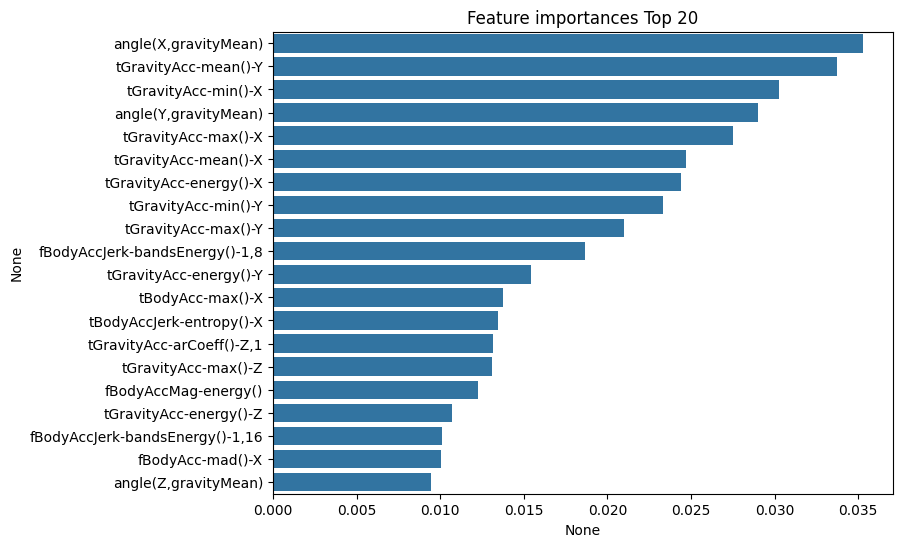

In [ ]:
# 피처 중요도를 막대그래프로 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

- GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도:{0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time()-start_time))

GBM 정확도:0.9386
GBM 수행 시간: 1387.8초


- XGBoost

In [4]:
pip install xgboost==1.5.0

In [5]:
import xgboost as xgb
from xgboost import XGBClassifier

In [6]:
import xgboost
print(xgboost.__version__)

1.5.0


- XGBoost 적용: 위스콘신 유방암 예측

In [7]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset =load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data = features, columns = dataset.feature_names)
cancer_df['target']=labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [8]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [9]:
# cancer_df 에서 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label이므로, Feature용 DF는 cancer_df의 첫번째~마지막 두번째 칼럼까지 :-1 슬라이싱 추출
X_features = cancer_df.iloc[:,:-1]  #피처
y_label = cancer_df.iloc[:,-1]   #레이블

# 전체 데이터 중 80%는 학습용, 20%는 테스트용 데이터로 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 90% 학습용 10% 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [10]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환.

# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr.values, label=y_tr.values)
dval = xgb.DMatrix(data=X_val.values, label=y_val.values)
dtest = xgb.DMatrix(data=X_test.values, label=y_test.values)

In [11]:
# 하이퍼 파라미터 설정
params = {'max_depth':3, 'eta':0.05, 'objective':'binary:logistic', 'eval_metric':'logloss'}
num_rounds = 400

In [12]:
# 지정 파라미터로 모델 학습
# 학습 데이터 셋은 'train', 평가 데이터 셋은 'eval'로 명기(평가만 명기가능)
eval_list = [(dtr, 'train'),(dval,'eval')]  #또는 eval_list = [(dval,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52929
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31893	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

In [13]:
# 50회 동안 logloss 값이 향상되지 않았으므로 정지함

In [14]:
# 학습 모델로 테스트 데이터 세트 예측 수행

pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds 에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [15]:
# 평가에서 사용한 get_clf_eval 함수
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [16]:
# XGBoost 모델의 예측 성능 평가
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9937


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

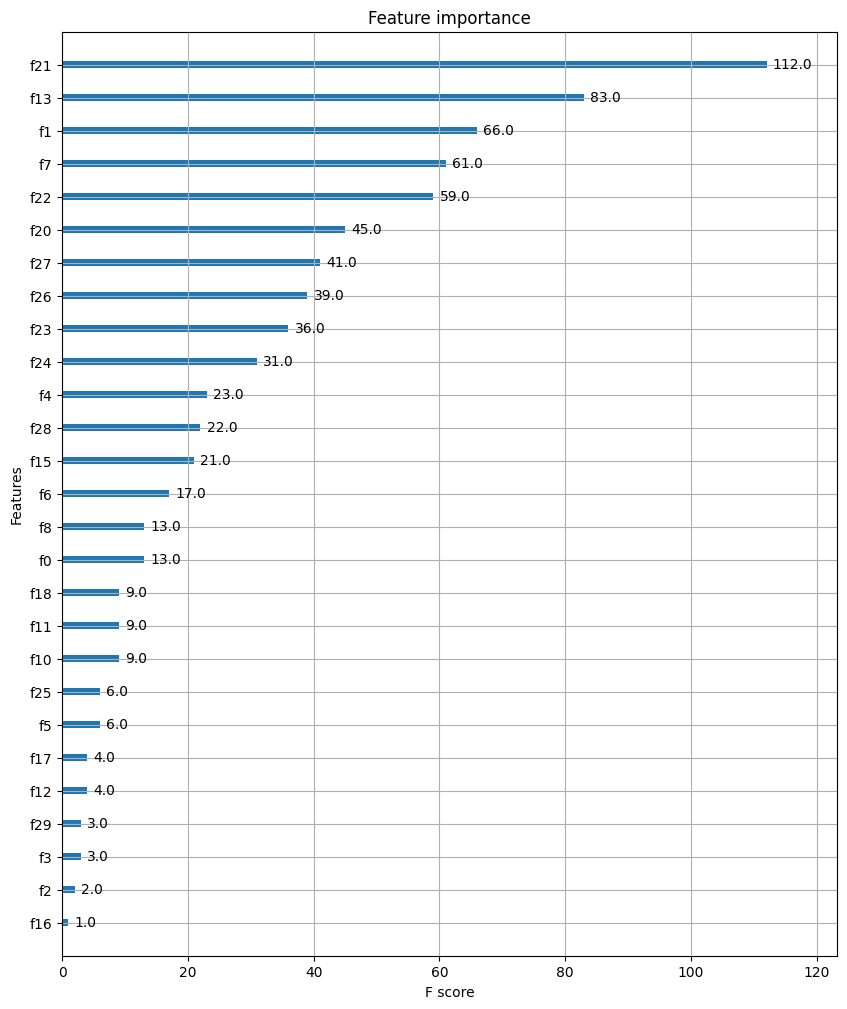

In [17]:
# 내장된 시각화 기능
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

- 사이킷런 래퍼 XGBoost의 개요 및 적용

In [18]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metrics 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train.values, y_train.values, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [19]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [21]:
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr.values, y_tr.values), (X_val.values, y_val.values)]
xgb_wrapper.fit(X_tr.values, y_tr.values, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)
ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

In [22]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9933


In [23]:
# early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_tr.values, y_tr.values, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

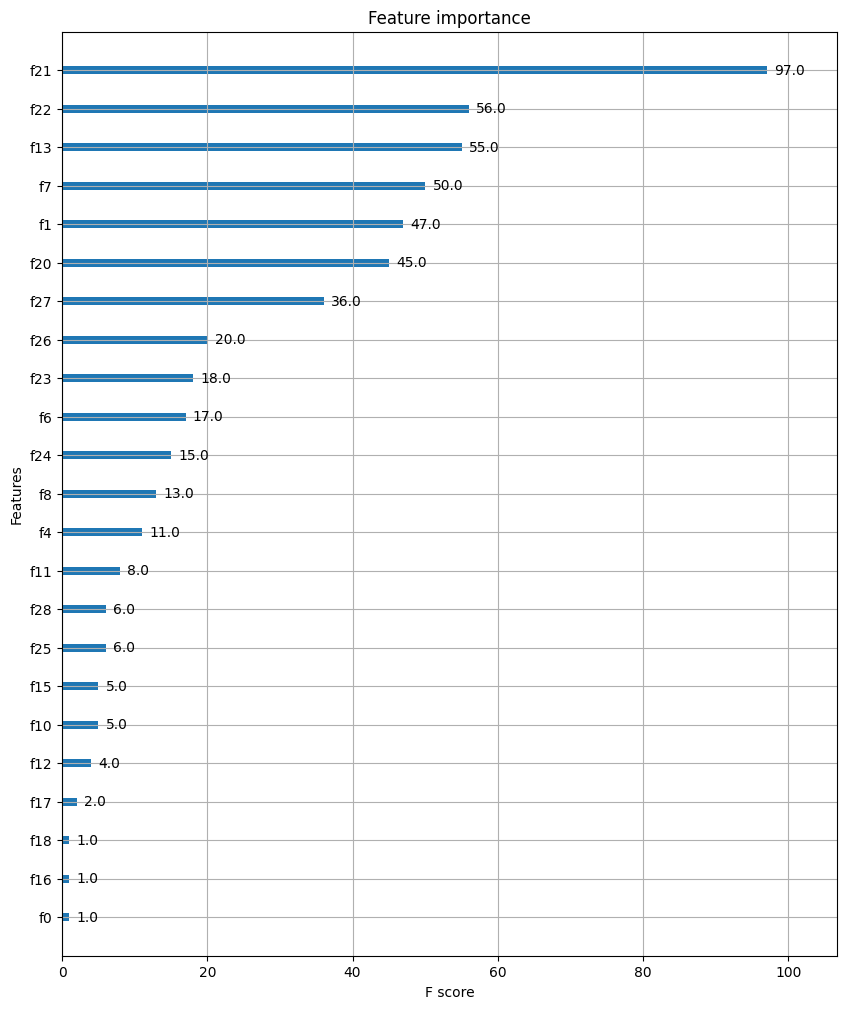

In [24]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)